# Pandas and Data Analysis: An Introduction

[**Pandas**](http://pandas.pydata.org) is an user-friendly data analysis tool for Python. 

In Jupyter Notebook we can easily *load*, *clean* and *analyse* data by Pandas. 

For detailed information of Pandas, you can refer to [here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).

-------------------------
We may use packages such as Pandas, NumPy and Matplotlib.

As long as being imported once at the beginning of this notebook, we don't have to import it again within this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Load Data <a id='Section 1'></a>
 
The very first step to analyse data is to load data. 

In this section, we introduce how to: 
  + load local data stored in your device, and 
  + get data through Internet. 


### 1.1 Local Data

Before loading local data, we have to check the file format by its file extension, for example, *csv* or *txt*. 

Pandas can load various data file into [*Data Frame*](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 

The most common financial data files are [csv](https://en.wikipedia.org/wiki/Comma-separated_values) data file and [txt](https://en.wikipedia.org/wiki/Text_file) data file.

Here we take *csv* file as an example by [read_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html). 

You may also have data stored in a file formatted by other software, such as *xlsx* from Excel, *sql* from MSSQL, *dta* from Stata, etc. 

There are many alternative ways to load data from other sources, such as [read_excel](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) for *xlsx* file, [read_sql](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html) for *sql* file, [read_stata](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_stata.html) for *dta* file, etc.

-----------------
+ We need import library at the beginning of code to make use of functions in that library. 

    It is convenient to make alias of Pandas as pd.


+ We use *AUD1MTD156N.csv*, which is 1-Month London Interbank Offered Rate (LIBOR) based on AUD, in the following example. You can download the data file from Ed. 

    [LIBOR](https://en.wikipedia.org/wiki/Libor) is fundamental interest rate in financial market.
    
    The data file used in Section 1.1 is downloaded from the website of [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/categories/33003/downloaddata). 
    
    If you could not download the data file from Ed, you may also download the zipfile from the website. 
    

+    We have to tell computer what the separator, or [delimiter](https://en.wikipedia.org/wiki/Delimiter), is in our data file. 

    The separator in *csv* file is comma and we specify it in `sep`. 
    


In [25]:
df = pd.read_table('AUD1MTD156N.csv', sep = ',')

You may wonder whether you have successfully loaded the data and what the data looks like. 

To check the first few lines of data, you can try:

In [26]:
df.head()

,DATE,VALUE
0,1989-01-03,14.62500
1,1989-01-04,14.59375
2,1989-01-05,14.57813
3,1989-01-06,14.67188
4,1989-01-09,14.75000


We will discuss more about data preview in [Section 2.1](#Section2.1).

You may also try some simple plots.

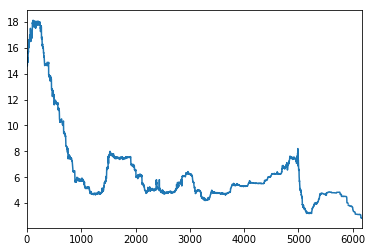

In [27]:
df1 = pd.to_numeric(df.VALUE, errors='coerce')
df1.plot()
plt.show()

We will introduce how to make the plot more informative (to add legends, labels, plot types, etc.) in the future.

----------------------------
We can also load *txt* file by `read_table`. 

Note that *csv* file is comma-separated. While the separator of *txt* file can be different. 

In *AUD1MTD156N.txt*, the separator is space.

<div class="alert alert-block alert-info"><b> Exercise:<br>
Try to load the txt file by changing the file name and separator. <br>
What do you find?</b>

In [28]:
df_txt = pd.read_table('AUD1MTD156N.txt', sep=' ')

In [29]:
df_txt.head()

,DATE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,VALUE
0,1989-01-03,NaN,14.62500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1989-01-04,NaN,14.59375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-01-05,NaN,14.57813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-01-06,NaN,14.67188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-01-09,NaN,14.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the exercise above, you may find redundant columns. 

We can delete those columns by simply adding one option, `skipinitialspace` , as follows.

In [30]:
df_txt = pd.read_table('AUD1MTD156N.txt', sep=' ', skipinitialspace=True)

In [31]:
df_txt.head()

,DATE,VALUE
0,1989-01-03,14.62500
1,1989-01-04,14.59375
2,1989-01-05,14.57813
3,1989-01-06,14.67188
4,1989-01-09,14.75000


-----------------------
You can explore more options by yourself as:

In [ ]:
pd.read_table?

To get data from a SQL database, you can refer to [here](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/08%20-%20Lesson.ipynb).

### 1.2 Internet data
+ Getting financial data through Internet is super convenient with Pandas. 

    Imagine that you would like to download data from ten (or even more) different webpages. 

    Absolutely we don't want to click every webpage by hand. 
    

+ Pandas provides API to fetch data from websites. 

    And we could install the package, `pandas_datareader`, to fetch data.

    More details about `pandas_datareader` can be found [here](https://media.readthedocs.org/pdf/pandas-datareader/stable/pandas-datareader.pdf).
    
    Let's install the package. 
    
    We only need to install it once. Next time you can just import it.

In [17]:
#import pip #this doesn't work inside EdStem
# pip.main(['install', 'package', 'pandas-datareader'])


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/AAPL/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f1328993240>: Failed to establish a new connection: [Errno -2] Name or service not known',))

+ We can get financial data from [Yahoo!](https://finance.yahoo.com) or [Google](http://www.google.com/finance/historical?q=NASDAQ%3AGOOG&ei=xWamWeC5DNaV0AT96pigBA). 

--------------------
Let's take the stock price of Google as an example. 

Usually we need [ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol), data source and the time period. 

The ticker symbol of Google is *GOOGL*.

In [16]:
import pandas_datareader as pdr
#from pandas_datareader import data
Googl = pdr.DataReader('GOOGL', 'yahoo', '2016-01-01' , '2016-12-31')
#Googl = data.DataReader('GOOGL', 'yahoo', '2016-01-01' , '2016-12-31')

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/GOOGL/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f13289ad390>: Failed to establish a new connection: [Errno -2] Name or service not known',))

In [10]:
Googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,787.820007,788.330017,777.320007,778.010010,778.010010,1637600
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600


<div class="alert alert-block alert-info"><b> Exercise:<br>
Please download stock price for Apple Inc. from 01 Jan 2010 to 31 Dec 2016. <br>
*Hint: the ticker symble is AAPL.*</b>

<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>
<div id="sol1" class="collapse">
```python
AAPL = data.DataReader('AAPL', 'yahoo', '2010-01-01' , '2016-12-31')
```

You can get more than one stock and change the data source. 

Note that when you obtain multiple stocks, the data returned is panel data, which is not callable and `df.head()` doesn't work in this situation. 

We will discuss how to preview panel data in [Section 2.1](#Section2.1).  <a id='PanelData'></a>

In [2]:
import pandas as pd
from pandas_datareader import data

Tickers = ['AAPL','GOOGL']
DataSource = 'yahoo'
StartDate = '2016-01-01'
EndDate = '2016-12-31'
df_panel = data.DataReader(Tickers, DataSource, StartDate, EndDate)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/['AAPL',%20'GOOGL']/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f1328a4f588>: Failed to establish a new connection: [Errno -2] Name or service not known',))

If you are interested in download S&P 500 tickers and data, you may also try [here](http://www.thealgoengineer.com/2014/download_sp500_data/).

## 2. Clean and Analyse Data
Congratulations! You have already got your own data from [Section 1](#Section 1). 

But wait... We cannot go to data analysis directly! 

Keep calm and let's get the preparation done! 

### 2.1 Preview <a id='Section2.1'></a>

To preview data is a good way to know your data.

By simply typing the name and running the cell, we can preview the data. 

------------------------

Try `Googl` and run the cell. What do you find?

In [12]:
Googl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,787.820007,788.330017,777.320007,778.010010,778.010010,1637600
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300
2016-01-11,731.950012,735.080017,719.559998,733.070007,733.070007,2537900
2016-01-12,740.750000,748.340027,736.429993,745.340027,745.340027,2340800
2016-01-13,749.340027,753.000000,716.780029,719.570007,719.570007,2586400


Jupyter Notebook automatically ignore several lines to save space. 

When the dataset is large, we don't want to check all entries in the data frame. 

We have already tried `df.head()`. Let's explore other possibilities.

In [13]:
Googl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,808.010010,810.969971,805.109985,807.799988,807.799988,764100
2016-12-27,808.679993,816.000000,805.799988,809.929993,809.929993,976000
2016-12-28,813.330017,813.330017,802.440002,804.570007,804.570007,1214800
2016-12-29,802.330017,805.750000,798.140015,802.880005,802.880005,1056500
2016-12-30,803.210022,803.289978,789.619995,792.450012,792.450012,1735900


In [14]:
Googl.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-28,813.330017,813.330017,802.440002,804.570007,804.570007,1214800
2016-12-29,802.330017,805.750000,798.140015,802.880005,802.880005,1056500
2016-12-30,803.210022,803.289978,789.619995,792.450012,792.450012,1735900


In [15]:
Googl.shape

(253, 6)

In [16]:
Googl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
Googl.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

You may explore more options by inputting `Googl.` in `code` mode and then pressing `tab`.

In [ ]:
Googl.

--------------------
Recall that we encounter *panel data* in [Section 1.2](#PanelData).

We cannot preview panel data simply by `df_panel.head()`. 

What do you find when you run the following cell?

In [18]:
df_panel.head()

NotImplementedError: 

Notice that we have two stocks in `df_panel` so that we cannot simply show it in a two-dimensional table.

But we can reduce dimension. 

For example, we can preview the open price only.

In [19]:
df_panel.Open.tail()

,AAPL,GOOGL
Date,,
2016-01-07,98.680000,746.489990
2016-01-06,100.559998,750.369995
2016-01-05,105.750000,764.099976
2016-01-04,102.610001,762.200012
2015-12-31,107.010002,787.820007


You may find the open price presented above is descending by Date. 

If you want it ascending, you may try `sort_index`.

Note that `Date` in this panel data is *index*, not a *column*.

In [20]:
df_panel.sort_index(axis=1, ascending=True).Open.tail()

,AAPL,GOOGL
Date,,
2016-12-23,115.589996,808.010010
2016-12-27,116.519997,808.679993
2016-12-28,117.519997,813.330017
2016-12-29,116.449997,802.330017
2016-12-30,116.650002,803.210022


<div class="alert alert-block alert-info"><b> Exercise:<br>
Please preview first 10 close prices of AAPL.</b>

<button data-toggle="collapse" data-target="#sol4" class='btn btn-primary'>Solution</button>
<div id="sol4" class="collapse">
```python
df_panel.sort_index(axis=1, ascending=True).Close.AAPL.head(10)
```

### 2.2 Type and Structure
Now you are getting familiar with data. 

We are going to investigate [data types](https://docs.python.org/3/library/datatypes.html) and [data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) in Pandas. 

Data types and structures matter because they have diversified methods and functionalities.

#### 2.2.1 Data Types
Some data types we may find in financial data including
  + numeric types and
  + string
  
More can be found [here](https://en.wikibooks.org/wiki/Python_Programming/Data_Types).

You can check the data type by `type()` function.

#### 2.2.1.1 Numeric Types

Numeric types are important in financial data. We can apply various math operations to numeric types. 

Try the following examples. Notice when the value of variable changed and how. 

For details, try [here](https://docs.python.org/3/library/math.html).

In [21]:
x = 1

In [22]:
type(x)

int

In [23]:
y = 1.2

In [24]:
type(y)

float

In [25]:
t = x

In [26]:
t = 3

In [27]:
x

1

In [28]:
w = x + y

In [29]:
w

2.2

In [30]:
x = x - y

In [31]:
x

-0.19999999999999996

In [32]:
w = 2 ** 3

In [33]:
w

8

In [34]:
type(w)

int

<div class="alert alert-block alert-info"><b> Exercise:<br>
Try to check the type of $z$ in the following cells.<br>
What do you find?</b>

In [35]:
z = 2//3

In [36]:
type(z)

int

In [37]:
z = 2/3

In [38]:
type(z)

float

#### 2.2.1.2 String

In [39]:
a = 'financial'

In [40]:
type(a)

str

In [41]:
b = 'economics'

In [42]:
c = a + ' ' + b # It is not addition in numeric types!

In [43]:
c

'financial economics'

In [44]:
len(a)

9

In [45]:
len(c)

19

In [46]:
df.DATE[1]

'1989-01-04'

In [47]:
type(df.DATE[1])

str

In [48]:
df.VALUE[1]

'14.59375'

<div class="alert alert-block alert-info"><b> Exercise:<br>
Try to check the type of `df.VALUE[1]`.<br>
What do you find?</b>

In [49]:
type(df.VALUE[1])

str

You may find `df.VALUE[1]` is a string. 

--------------
In practice, loading data does **NOT** automatically give us the data type we want.

However, We can change the data type to numeric types.

In [50]:
a = float(df.VALUE[1])
a

14.59375

In [51]:
type(a)

float

We may also change the data type for all values.

In [52]:
df.VALUE = pd.to_numeric(df.VALUE, errors='coerce')

In [53]:
df.VALUE

0       14.62500
1       14.59375
2       14.57813
3       14.67188
4       14.75000
5       14.78125
6       14.62500
7       14.62500
8       14.75000
9       14.87500
10      14.96875
11      15.25000
12      15.12500
13      15.12500
14      15.12500
15      15.00000
16      14.87500
17      14.92188
18      14.87500
19      14.89063
20      15.29688
21      15.34375
22      15.60938
23      15.57813
24      15.75000
25      15.75000
26      15.75000
27      15.64063
28      15.87500
29      16.00000
          ...   
6139     3.11600
6140     3.11600
6141     3.11600
6142     3.11200
6143     3.10200
6144     3.09800
6145     3.09600
6146     3.09600
6147     3.09400
6148     3.09200
6149     3.08000
6150     3.08000
6151     2.94000
6152     2.91800
6153     2.88400
6154     2.86800
6155     2.86200
6156     2.86000
6157     2.86400
6158     2.88000
6159     2.87600
6160     2.87000
6161     2.86800
6162     2.86400
6163     2.85700
6164     2.86700
6165     2.86300
6166     2.861

#### 2.2.2 Data Structures

The basic [data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) in Pandas are *Series* and *Data Frame*.

We introduce *Data Frame* in this section.

We can use `type()` function to check data structures.


Data frame is similar to series. But Data frame is two-dimensional.

We still employ the example of LIBOR.

In [54]:
type(df)

pandas.core.frame.DataFrame

In [55]:
df['DATE']

0       1989-01-03
1       1989-01-04
2       1989-01-05
3       1989-01-06
4       1989-01-09
5       1989-01-10
6       1989-01-11
7       1989-01-12
8       1989-01-13
9       1989-01-16
10      1989-01-17
11      1989-01-18
12      1989-01-19
13      1989-01-20
14      1989-01-23
15      1989-01-24
16      1989-01-25
17      1989-01-26
18      1989-01-27
19      1989-01-30
20      1989-01-31
21      1989-02-01
22      1989-02-02
23      1989-02-03
24      1989-02-06
25      1989-02-07
26      1989-02-08
27      1989-02-09
28      1989-02-10
29      1989-02-13
           ...    
6139    2013-04-18
6140    2013-04-19
6141    2013-04-22
6142    2013-04-23
6143    2013-04-24
6144    2013-04-25
6145    2013-04-26
6146    2013-04-29
6147    2013-04-30
6148    2013-05-01
6149    2013-05-02
6150    2013-05-03
6151    2013-05-07
6152    2013-05-08
6153    2013-05-09
6154    2013-05-10
6155    2013-05-13
6156    2013-05-14
6157    2013-05-15
6158    2013-05-16
6159    2013-05-17
6160    2013

In [56]:
print('Start Date:', min(df['DATE']),'\n End Date:', max(df['DATE']))

Start Date: 1989-01-03 
 End Date: 2013-05-31


In [ ]:
df.

-------------------
#### 2.2.2.1 Select Data

In [57]:
df[1:3]

,DATE,VALUE
1,1989-01-04,14.59375
2,1989-01-05,14.57813


In [58]:
df.loc[df.DATE == '2000-05-30']

,DATE,VALUE
2879,2000-05-30,6.10625


In [59]:
df_after_2000 = df[df['DATE'] > '2000-01-01']

In [60]:
df_after_2000

,DATE,VALUE
2778,2000-01-04,5.27000
2779,2000-01-05,5.25000
2780,2000-01-06,5.22969
2781,2000-01-07,5.24500
2782,2000-01-10,5.25000
2783,2000-01-11,5.25000
2784,2000-01-12,5.25000
2785,2000-01-13,5.24500
2786,2000-01-14,5.23719
2787,2000-01-17,5.21969


------------------
#### 2.2.2.2 Generate Data
For example, we can calculate the log return of LIBOR.

In [61]:
df_after_2000['RETURN'] = np.log(df.VALUE).diff()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_after_2000.columns

Index(['DATE', 'VALUE', 'RETURN'], dtype='object')

In [63]:
df_after_2000

,DATE,VALUE,RETURN
2778,2000-01-04,5.27000,-0.009561
2779,2000-01-05,5.25000,-0.003802
2780,2000-01-06,5.22969,-0.003876
2781,2000-01-07,5.24500,0.002923
2782,2000-01-10,5.25000,0.000953
2783,2000-01-11,5.25000,0.000000
2784,2000-01-12,5.25000,0.000000
2785,2000-01-13,5.24500,-0.000953
2786,2000-01-14,5.23719,-0.001490
2787,2000-01-17,5.21969,-0.003347


-----------------------
We can generate **categorical** data, too.

In [64]:
df_after_2000['POSITIVE'] = df_after_2000.RETURN>0

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_after_2000.head(10)

,DATE,VALUE,RETURN,POSITIVE
2778,2000-01-04,5.27000,-0.009561,False
2779,2000-01-05,5.25000,-0.003802,False
2780,2000-01-06,5.22969,-0.003876,False
2781,2000-01-07,5.24500,0.002923,True
2782,2000-01-10,5.25000,0.000953,True
2783,2000-01-11,5.25000,0.000000,False
2784,2000-01-12,5.25000,0.000000,False
2785,2000-01-13,5.24500,-0.000953,False
2786,2000-01-14,5.23719,-0.001490,False
2787,2000-01-17,5.21969,-0.003347,False


-------------------
We can also generate **dummy** variable from categorical data.

In [68]:
df_after_2000['DUMMY'] = pd.get_dummies(df_after_2000.POSITIVE,drop_first=True)
df_after_2000.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,VALUE,RETURN,POSITIVE,DUMMY
2778,2000-01-04,5.27000,-0.009561,False,0
2779,2000-01-05,5.25000,-0.003802,False,0
2780,2000-01-06,5.22969,-0.003876,False,0
2781,2000-01-07,5.24500,0.002923,True,1
2782,2000-01-10,5.25000,0.000953,True,1


--------------
To generate a new variable by two existing varibles.

In [69]:
df['RETURN_2010'] = np.log(df.VALUE[df.DATE > '2010-01-01']).diff()

In [70]:
df.tail()

,DATE,VALUE,RETURN_2010
6164,2013-05-24,2.867,0.003494
6165,2013-05-28,2.863,-0.001396
6166,2013-05-29,2.861,-0.000699
6167,2013-05-30,2.861,0.000000
6168,2013-05-31,2.865,0.001397


-------------------
#### 2.2.2.3 Simple statistics


In [71]:
df.describe()

,VALUE,RETURN_2010
count,6166.000000,857.000000
mean,6.464813,-0.000333
std,3.205446,0.004852
min,2.857000,-0.088369
25%,4.800000,-0.000531
50%,5.422190,0.000000
75%,6.864375,0.000000
max,18.125000,0.042016


In [72]:
df_after_2000.describe()

,VALUE,RETURN,DUMMY
count,3388.000000,3386.000000,3391.000000
mean,5.121667,-0.000172,0.409319
std,1.063746,0.006903,0.491781
min,2.857000,-0.119801,0.000000
25%,4.526000,-0.001054,0.000000
50%,4.941250,0.000000,0.000000
75%,5.738437,0.001190,1.000000
max,8.212500,0.113329,1.000000


You may be curious about to what extent we can make nonnegative return.

In [73]:
a = len(df_after_2000[df_after_2000['RETURN'] > 0])/len(df_after_2000)
print(round(100*a,2),'%')

40.93 %


### 2.3 Missing Data

[Missing data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data) is an important issue in real world financial data. 

We don't always enjoy the luxury of perfect data.

Some functions or algorithms may fail with missing data.


Note: <span style="color:red">**NaN**</span> (not a number) is the standard missing data marker used in pandas.

--------------------
First, check whether there is any missing data in our data set.

In [74]:
df[pd.isnull(df.VALUE)]

,DATE,VALUE,RETURN_2010
5916,2012-06-04,NaN,NaN
5917,2012-06-05,NaN,NaN
5976,2012-08-27,NaN,NaN


In [75]:
df[df.VALUE.isnull()]

,DATE,VALUE,RETURN_2010
5916,2012-06-04,NaN,NaN
5917,2012-06-05,NaN,NaN
5976,2012-08-27,NaN,NaN


You may wonder where the missing data comes from. 

Recall that we changed data type in Section 2.2.1.2. This step could generate missing data.

We can go back and check the original data.

In [76]:
df_original = pd.read_table('AUD1MTD156N.csv', sep = ',')
df_original.iloc[[5916,5917,5976]]

,DATE,VALUE
5916,2012-06-04,.
5917,2012-06-05,.
5976,2012-08-27,.


In the original data, it has already been missing.

------------------------
Then, we may remove rows with missing data or replace missing data with different values.

Since we can always select the rows, we don't have to remove it.

In [77]:
df_original.VALUE = pd.to_numeric(df.VALUE, errors='coerce')
df_original.shape

(6169, 2)

In [78]:
df_original.dropna(inplace=True)

In [79]:
df_original.shape

(6166, 2)

-----------------------

In [80]:
df1 = df.VALUE.fillna(method='pad')
df1.iloc[[5916,5917,5976]]

5916    3.989
5917    3.989
5976    3.748
Name: VALUE, dtype: float64

In [81]:
df2 = df.fillna(method='bfill')
df2.iloc[[5916,5917,5976]]

,DATE,VALUE,RETURN_2010
5916,2012-06-04,3.849,-0.002341
5917,2012-06-05,3.849,-0.002341
5976,2012-08-27,3.748,0.000000


In [82]:
df3 = df.fillna(df.VALUE.mean())
df3.iloc[[5916,5917,5976]]

,DATE,VALUE,RETURN_2010
5916,2012-06-04,6.464813,6.464813
5917,2012-06-05,6.464813,6.464813
5976,2012-08-27,6.464813,6.464813


In [83]:
df4 = df.interpolate()
df4.iloc[[5916,5917,5976]]

,DATE,VALUE,RETURN_2010
5916,2012-06-04,3.942333,-0.001525
5917,2012-06-05,3.895667,-0.001797
5976,2012-08-27,3.748000,-0.000711


In [84]:
df5 = df.VALUE.replace(np.nan,0)
df5.iloc[[5916,5917,5976]]

5916    0.0
5917    0.0
5976    0.0
Name: VALUE, dtype: float64

### 2.4 Save Data

It is very important to save your work before you shut down this notebook. Otherwise everything will be lost.

Like loading local data, we have many data files to save.

Here we take csv as an example.

In [85]:
df.to_csv('LIBOR.csv')

In [86]:
df_save = pd.read_table('LIBOR.csv', sep = ',')

In [87]:
df_save.tail()

,Unnamed: 0,DATE,VALUE,RETURN_2010
6164,6164,2013-05-24,2.867,0.003494
6165,6165,2013-05-28,2.863,-0.001396
6166,6166,2013-05-29,2.861,-0.000699
6167,6167,2013-05-30,2.861,0.000000
6168,6168,2013-05-31,2.865,0.001397
